In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset

data = load_dataset('lukebarousse/data_jobs')
df = data['train'].to_pandas()


In [3]:
import ast
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill:ast.literal_eval(skill) if pd.notna(skill) else skill )

In [4]:
df_DA_US = df[(df['job_title_short']== 'Data Analyst') & (df['job_country']== 'United States')]

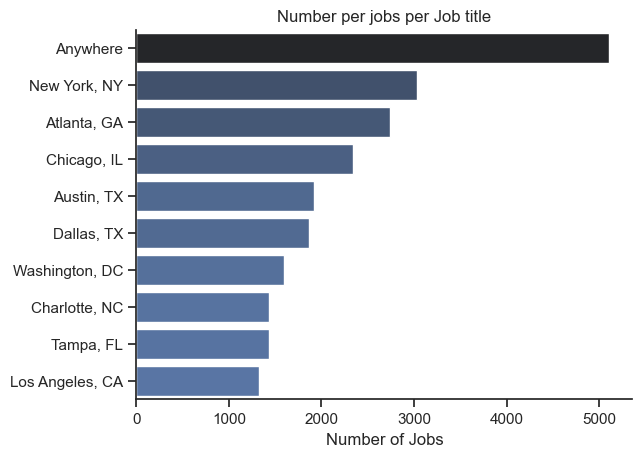

In [15]:
df_plot = df_DA_US['job_location'].value_counts().head(10).to_frame()
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.set_theme(style='ticks')
sns.despine()
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.title('Number per jobs per Job title')
plt.show()

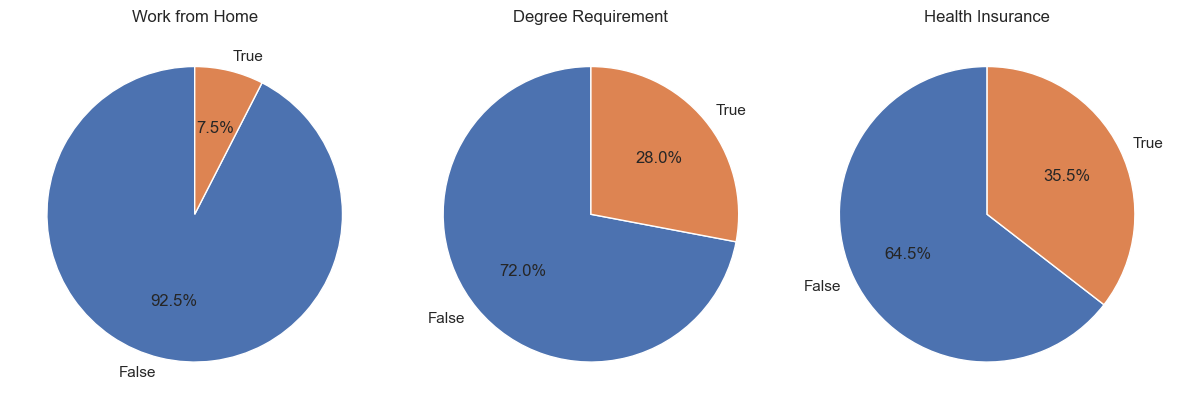

In [21]:
dict_column = {
      'job_work_from_home':'Work from Home',
      'job_no_degree_mention': 'Degree Requirement',
      'job_health_insurance': 'Health Insurance'
}

fig, ax = plt.subplots(1,3)
fig.set_size_inches((12,5))

for i, (column, title) in enumerate(dict_column.items()):
      ax[i].pie(df_DA_US[column].value_counts(), labels=['False', 'True'], startangle=90, autopct='%1.1f%%')
      ax[i].set_title(title)
      
fig.tight_layout()
plt.show()


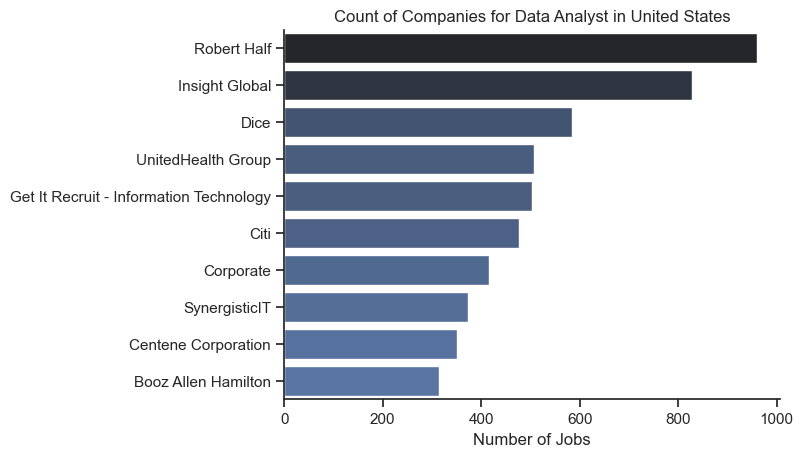

In [22]:
df_plot = df_DA_US['company_name'].value_counts().head(10).to_frame()
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.set_theme(style='ticks')
sns.despine()
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.title('Count of Companies for Data Analyst in United States')
plt.show()